<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E3%81%AE%E5%85%A8%E4%BD%93%E5%83%8F%E3%83%BB%E6%89%8B%E6%B3%95_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習実装

1. データの特徴について確認します。（5問）
    - 各変数のデータ型、行列数、統計量を算出し、今回扱うデータの外観を把握します。
2. データを加工する方法について学習します。（11問）
    - 各変数をモデルに入れる形に整えます。（特徴量生成フェーズ）
3. 特徴量の選別方法について学習します。（10問）
    - 各特徴量の詳細な特徴を把握し、目的変数との関連性を確認します。（特徴量評価フェーズ）
4. 学習データと検証データに分割することについて学習します。（3問）
    - 学習に使用したデータは検証に使用できません。モデリング前の下準備について把握します。
5. 決定木モデルについて学習します。（分類）（19問）
    - 決定木モデルを参考に機械学習のフローについて理解し、精度を算出することが目的です。
6. ランダムフォレストについて学習します。（分類、回帰）（15問）
    - ランダムフォレストモデルで精度を算出することが目的です。


### 0. 事前準備

#### 0.0  次のコードを実行してください。

In [1]:
# こちらのセルを実行してください。
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=70236cd0cd77ea3102469312b4e79250cf901fcbeda2dbe0ef84c905f3a23135
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


#### 0.1  次のモジュールを読み込んで下さい。

- numpy
- pandas
- matplotlib.pyplot
- seaborn
- japanize_matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

#### 0.2  訓練データと検証データを分ける関数、精度評価を行う関数を読み込んで下さい。

In [3]:
from sklearn.model_selection import train_test_split # 訓練データと検証データに分ける関数
from sklearn.metrics import confusion_matrix, accuracy_score # 混同行列, 予測正解率を求める関数

#### 0.3  次のコードを実行して、今回使用する「タイタニック」データを読み込んで下さい。

In [4]:
# こちらのセルを実行してください。
titanic_data = pd.read_csv(filepath_or_buffer='https://lms-assets.web-camp.io/curriculum/Python/date_set/titanic3.csv',
                          sep=',', dtype={'pclass':'str'})
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


#### 0.4  今回使用する「タイタニック」データは以下のようなデータになっています。


- Pclass: 　乗客の階級、1が一番位が高い
- Survived: 　生存結果 (1: 生存, 0: 死亡)　
- Name: 　乗客の名前
- Sex:　 性別
- Age: 　年齢
- SibSp: 　兄弟、配偶者の数
- Parch: 　両親、子供の数
- Ticket: 　チケット番号
- Fare: 　乗船料金
- Cabin: 　部屋番号
- Embarked: 　乗船した港　Cherbourg、Queenstown、Southamptonの3種類
- boat: 　乗ったボート（生きていた場合）
- body: 　身体識別番号
- home.dest: 　目的地

### 1. データの特徴について確認します。（6問）

#### 1.1 レコード数を確認してください。

In [5]:
len(titanic_data)

1309

#### 1.2 カラムの数を確認してください。

In [6]:
len(titanic_data.columns)

14

#### 1.3 上から5行データを確認してください。

In [7]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1.4 次のコードを実行することで、各列のデータ型を確認してください。

In [8]:
# こちらのセルを実行してください。
titanic_data.dtypes

pclass        object
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

　これで、各列のデータ型が表示されました。
それぞれ
- object(文字列のデータ)
- int64(整数型のデータ)
- float64(実数型のデータ)

となっています。


#### 1.5 各カラムの統計量を算出してください。

In [9]:
titanic_data.describe().round()

,survived,age,sibsp,parch,fare,body
count,1309.0,1046.0,1309.0,1309.0,1308.0,121.0
mean,0.0,30.0,0.0,0.0,33.0,161.0
std,0.0,14.0,1.0,1.0,52.0,98.0
min,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,21.0,0.0,0.0,8.0,72.0
50%,0.0,28.0,0.0,0.0,14.0,155.0
75%,1.0,39.0,1.0,0.0,31.0,256.0
max,1.0,80.0,8.0,9.0,512.0,328.0


### 2.データを加工する方法について学習します。（11問）

#### モデルには数値データしか扱えません。また欠損値があると扱えないモデルも存在します。このステップではデータ加工し、モデルに入れる特徴量を作成するまでのステップを学習します。※本来の機械学習においては一番大事なフェーズです。今回は基本的な前処理方法を学習しますが、「実態のデータを再現するような加工処理を施す」ことが大切です。

#### 2.1 object型のデータを削除し、削除されていることを確認してください。

In [10]:
titanic_data_except_object = titanic_data[['survived', 'age', 'sibsp', 'parch', 'fare', 'body']].copy()
titanic_data_except_object

,survived,age,sibsp,parch,fare,body
0,1,29.00,0,0,211.3375,NaN
1,1,0.92,1,2,151.5500,NaN
2,0,2.00,1,2,151.5500,NaN
3,0,30.00,1,2,151.5500,135.0
4,0,25.00,1,2,151.5500,NaN
...,...,...,...,...,...,...
1304,0,14.50,1,0,14.4542,328.0
1305,0,NaN,1,0,14.4542,NaN
1306,0,26.50,0,0,7.2250,304.0
1307,0,27.00,0,0,7.2250,NaN


#### 2.2 各カラムの欠損値数を算出してください。(※object型のデータ除外後)

In [12]:
titanic_data_except_object.isna().sum()

survived       0
age          263
sibsp          0
parch          0
fare           1
body        1188
dtype: int64

#### 2.3 欠損値は補完する必要があります。「age」の分布を確認して下さい。

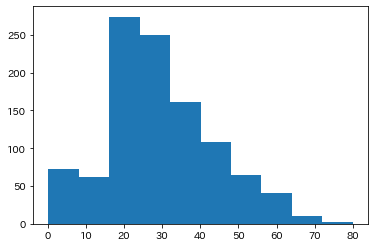

In [14]:
plt.hist(titanic_data_except_object['age'])
plt.show()

#### 2.4 分布を確認すると20代が多いようです。欠損値には「age」の平均値を補完してみましょう。

>strategy引数に'mean'を指定することで、平均値を用いた補完ができます。

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(titanic_data_except_object[['age']])
titanic_data_except_object[['age']] = imputer.transform((titanic_data_except_object[['age']]))

#### 2.5 「age」に欠損値が無くなったことを確認してください。

In [16]:
titanic_data_except_object[['age']].isna().sum()

age    0
dtype: int64

#### 2.6 bodyの欠損値も補完する必要があります。「body」の分布を確認して下さい。

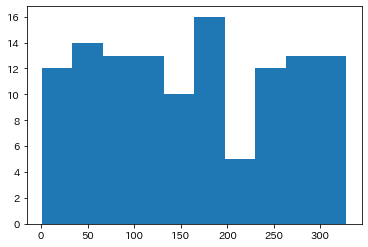

In [20]:
plt.hist(titanic_data_except_object['body'])
plt.show()

#### 2.7 欠損値が非常に多いです。欠損に意味を持たせるために、今存在しない値である「－1」を補完してみましょう。

In [23]:
titanic_data_except_object['body'] = titanic_data_except_object['body'].fillna(-1)


#### 2.8 bodyに欠損値が無くなったことを確認してください。

In [24]:
titanic_data_except_object['body'].isna().sum()

0

#### 2.9 fareの欠損値も補完する必要があります。「fare」の分布を確認して下さい。

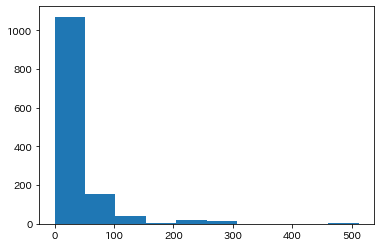

In [26]:
plt.hist(titanic_data_except_object['fare'])
plt.show()

#### 2.10 fareの欠損値は1件です。レコードを削除しても殆ど影響が無いので、削除してしまいましょう。1行減ったことを確認して下さい。

In [28]:
titanic_data_except_object = titanic_data_except_object.dropna()
titanic_data_except_object.shape

(1308, 6)

#### 2.11 欠損値が無くなったことを確認して下さい。

In [29]:
titanic_data_except_object.isna().sum()

survived    0
age         0
sibsp       0
parch       0
fare        0
body        0
dtype: int64

### 3. 特徴量の選別方法について学習します。（10問）

#### 目的変数と説明変数の関連性の調査を行います。目的変数に対してどういう変数が影響力を持っているか、前もって調査しておくことは大切です。その方法について学んでいきましょう。今回の目的変数は「survived」です。生存：1、死亡：0となります。

#### 3.1 「sibsp」のユニーク値毎に、生存割合を算出して下さい。※小数点3桁で表示して下さい。

In [33]:
titanic_data_except_object.groupby('sibsp').mean()['survived'].round(3)

sibsp
0    0.347
1    0.511
2    0.452
3    0.300
4    0.136
5    0.000
8    0.000
Name: survived, dtype: float64

#### 3.2 「parch」のユニーク値毎に、生存割合を算出してください。※小数点3桁で表示して下さい。

In [34]:
titanic_data_except_object.groupby('parch').mean()['survived'].round(3)

parch
0    0.336
1    0.588
2    0.504
3    0.625
4    0.167
5    0.167
6    0.000
9    0.000
Name: survived, dtype: float64

#### 3.3 「parch」の値ごとの死亡者数と生存者数をそれぞれ棒グラフで重ねて描画してください。その際に、それぞれに「死亡者」、「生存者」という凡例を表示して、グラフは半透明(引数alpha)にしてください。

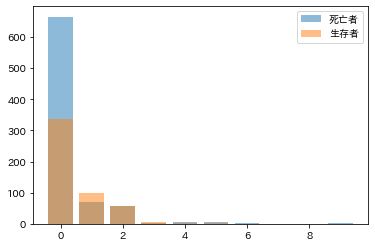

In [42]:
titanic_survived_parch = titanic_data_except_object.groupby(['parch', 'survived']).count().reset_index()

titanic_survived = titanic_survived_parch[titanic_survived_parch['survived'] == 1]
titanic_dead = titanic_survived_parch[titanic_survived_parch['survived'] == 0]

plt.figure()
plt.bar(titanic_dead['parch'], titanic_dead['age'], label='死亡者', alpha=0.5)
plt.bar(titanic_survived['parch'], titanic_survived['age'], label='生存者', alpha=0.5)

plt.legend()
plt.show()

#### 3.4 「age」はユニーク数が多く、値をグルーピングする必要があります。値を「10」刻みでグループ化し、各グループ毎に生存割合を算出してください。

In [45]:
s_cut = pd.cut(titanic_data_except_object['age'],[0,10,20,30,40,50,60,70,80,90,100])
titanic_data_except_object.groupby(s_cut).mean()['survived'].round(3)

age
(0, 10]      0.581
(10, 20]     0.395
(20, 30]     0.332
(30, 40]     0.424
(40, 50]     0.394
(50, 60]     0.484
(60, 70]     0.231
(70, 80]     0.333
(80, 90]       NaN
(90, 100]      NaN
Name: survived, dtype: float64

#### 3.5 「age」の値ごとの死亡者数と生存者数をそれぞれ棒グラフで重ねて描画してください。その際に、それぞれに「死亡者」、「生存者」という凡例を表示して、グラフは半透明(引数alpha)にしてください。また、棒グラフを描画する際にx軸の値はstr関数を適用することでstr型に直してください。

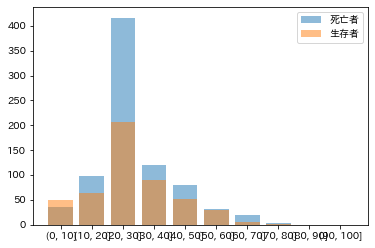

In [49]:
titanic_survived_copy = titanic_data_except_object.copy()
titanic_survived_copy['age_cut'] = s_cut

titanic_survived_agecut = titanic_survived_copy.groupby(['age_cut', 'survived']).count().reset_index()
titanic_survived_agecut

titanic_survived_age = titanic_survived_agecut[titanic_survived_agecut['survived'] == 1]
titanic_dead_age = titanic_survived_agecut[titanic_survived_agecut['survived'] == 0]

plt.figure()
plt.bar(titanic_dead_age['age_cut'].map(str), titanic_dead_age['age'], label='死亡者', alpha=0.5)
plt.bar(titanic_survived_age['age_cut'].map(str), titanic_survived_age['age'], label='生存者', alpha=0.5)

plt.legend()

plt.show()

#### 3.6 「fare」はユニーク数が多く、値をグルーピングする必要があります。値を昇順にして上から順番に「件数ができるだけ均等になるよう」グループ化を行い、各グループ毎に生存割合を算出してください。※値に重複があるので、完全に均等にする必要はありません。

In [55]:
fare_cut = pd.qcut(titanic_data_except_object['fare'],5)
titanic_data_except_object.groupby(fare_cut).mean()['survived'].round(3)

fare
(-0.001, 7.854]      0.258
(7.854, 10.5]        0.201
(10.5, 21.679]       0.380
(21.679, 41.579]     0.458
(41.579, 512.329]    0.618
Name: survived, dtype: float64

#### 3.7 「3.6で分けたグループ」ごとの死亡者数と生存者数をそれぞれ棒グラフで重ねて描画してください。その際に、それぞれに「死亡者」、「生存者」という凡例を表示して、グラフは半透明にしてください。また、棒グラフを描画する際にx軸の値はstr関数を適用することでstr型に直してください。

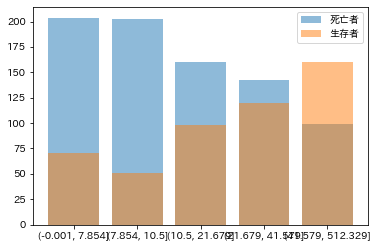

In [58]:
#データコピー fare_cutのデータを追加
titanic_survived_copy = titanic_data_except_object.copy()
titanic_survived_copy['fare_cut'] = fare_cut

titanic_survived_farecut = titanic_survived_copy.groupby(['fare_cut', 'survived']).count().reset_index()
titanic_survived_farecut

titanic_survived_fare = titanic_survived_farecut[titanic_survived_farecut['survived'] == 1]
titanic_dead_fare = titanic_survived_farecut[titanic_survived_farecut['survived'] == 0]

plt.figure()
plt.bar(titanic_dead_fare['fare_cut'].map(str), titanic_dead_fare['fare'], label='死亡者', alpha=0.5)
plt.bar(titanic_survived_fare['fare_cut'].map(str), titanic_survived_fare['fare'], label='生存者', alpha=0.5)

plt.legend()

plt.show()

#### 3.8 「body」はユニーク数が多く、値をグルーピングする必要があります。最大値と最小値の間を等間隔で5分割してください。また、各グループ毎に生存割合を算出してください。※値に重複があるので、完全に均等にする必要はありません。

In [60]:
body_cut = pd.cut(titanic_data_except_object['body'], 5)
titanic_data_except_object.groupby(body_cut).mean()['survived'].round(3)

body
(-1.329, 64.8]    0.412
(64.8, 130.6]     0.000
(130.6, 196.4]    0.000
(196.4, 262.2]    0.000
(262.2, 328.0]    0.000
Name: survived, dtype: float64

#### 3.9 「3.8で分けたグループ」ごとの死亡者数と生存者数をそれぞれ棒グラフで重ねて描画してください。その際に、それぞれに「死亡者」、「生存者」という凡例を表示して、グラフは半透明にしてください。また、棒グラフを描画する際にx軸の値はstr関数を適用することでstr型に直してください。

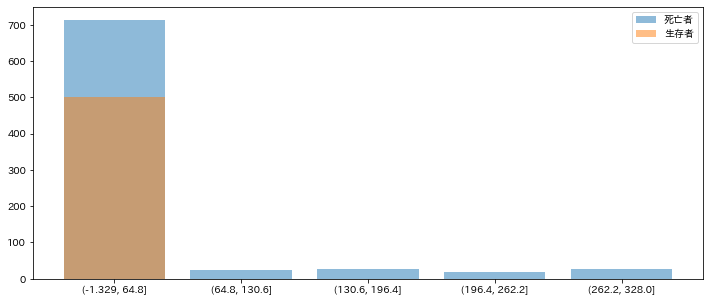

In [61]:
titanic_body_copy = titanic_data_except_object.copy()
titanic_body_copy['body_cut'] = body_cut

titanic_survived_bodycut = titanic_body_copy.groupby(['body_cut', 'survived']).count().reset_index()

titanic_survived_body = titanic_survived_bodycut[titanic_survived_bodycut['survived'] == 1]
titanic_dead_body = titanic_survived_bodycut[titanic_survived_bodycut['survived'] == 0]

plt.figure(figsize=(12, 5))
plt.bar(titanic_dead_body['body_cut'].map(str), titanic_dead_body['body'], label='死亡者', alpha=0.5)
plt.bar(titanic_survived_body['body_cut'].map(str), titanic_survived_body['body'], label='生存者', alpha=0.5)

plt.legend()

plt.show()

#### 3.10 各変数間の相関係数を算出してください。

In [62]:
titanic_data_except_object.corr()

,survived,age,sibsp,parch,fare,body
survived,1.000000,-0.048887,-0.028122,0.082418,0.244265,-0.211151
age,-0.048887,1.000000,-0.190304,-0.130355,0.171893,0.136776
sibsp,-0.028122,-0.190304,1.000000,0.373485,0.160238,-0.051933
parch,0.082418,-0.130355,0.373485,1.000000,0.221539,-0.023011
fare,0.244265,0.171893,0.160238,0.221539,1.000000,-0.012274
body,-0.211151,0.136776,-0.051933,-0.023011,-0.012274,1.000000


### 4. 学習データと検証データに分割する方法を学習します。（3問）

#### 先程のフェーズでは、全て数値データに変換し、今回予測する「生存」との関連性を評価しました。今フェーズはモデルの作成の為の最終準備です。未知のデータに対する予測値を算出したいので、学習に使用するデータと検証に使用するデータを分割し、擬似的に未知データを作り出します。

#### ※下記は、scikit-learn==1.0.2の結果です。バージョン毎で表示形式が異なる場合がございます。数値がおおよそ一致していれば、問題ございません。
#### 4.1 決定木(分類木)のモジュールをインポートして下さい。

In [63]:
from sklearn.tree import DecisionTreeClassifier

#### 4.2 説明変数と目的変数を分けて、それぞれ「X」,「y」と言う変数名に格納し、レコード数, カラム数を確認して下さい。

In [68]:
X = titanic_data_except_object.drop('survived', axis=1)
y = titanic_data_except_object['survived']
print(X.shape)
print(y.shape)

(1308, 5)
(1308,)


#### 4.3 説明変数、目的変数をそれぞれ学習データと検証データを7:3の割合で作成して下さい。変数名はX_train（説明変数の学習データ）, X_test（説明変数の検証データ）, y_train（目的変数の学習データ）, y_test（目的変数の検証データ）として下さい。test_size引数を指定することで検証データの割合を指定できます。その際インデックスのシャッフルはしないようにして、random_state引数に0を指定してください。また、各変数の上5行を確認して下さい。

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     age  sibsp  parch      fare   body
0  29.00      0      0  211.3375   -1.0
1   0.92      1      2  151.5500   -1.0
2   2.00      1      2  151.5500   -1.0
3  30.00      1      2  151.5500  135.0
4  25.00      1      2  151.5500   -1.0
           age  sibsp  parch     fare  body
915  22.000000      0      0   7.5208  -1.0
916   4.000000      0      1  13.4167  -1.0
917  39.000000      0      1  13.4167  -1.0
918  29.881138      0      0   7.2292  -1.0
919  18.500000      0      0   7.2292  58.0
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64
915    0
916    1
917    1
918    0
919    0
Name: survived, dtype: int64


### 5. モデリング方法について学習します。（19問）

#### この章では、決定木モデルを例にして機械学習の一般的なフロー（パラメータチューニング、特徴量の追加、評価指標）を学習します。（モデルを作成するときはrandom_state=0を指定してください。）

#### 5.1 分類木のrandom_state引数に「0」を指定し、decision_treeという変数名のインスタンスを生成してください。※random_stateに数字を入れることで、結果を固定することができます。

In [73]:
decision_tree = DecisionTreeClassifier(random_state=0)

#### 5.2 fit関数を使い、学習データを使用して決定木を作成して下さい。※ここが「学習」と呼ばれる処理になります。

#### 5.3 「5.2」で決定木は作成できました。作成した決定木を用いて、新規データ（X_test）に対する予測値を出力してください。※ここが「予測」と呼ばれる処理になります。

#### 5.4 精度を確認していきましょう。学習データに使用しなかった「目的変数の検証データ（y_test）」を使用して、正解率を算出してください。

#### 5.5 今回の結果の混同行列を出力してください。

#### 5.6 正解率は算出できましたが、まだまだ向上の余地がありそうです。「max_depth」を「4」に設定して正解率を算出し直しましょう。

#### 5.7 やや正解率が向上したようです。混同行列も確認してみましょう。

#### 5.8 様々なパラメータを試す余地がありそうです。2～6までの順続きのリストを作成し、「min_samples_split_list」と名前を付けて下さい。

#### 5.9 X_train, y_trainを用いたグリッドサーチをすることによって、「5.8」で作成したリストの要素分、「min_samples_split」をパラメータチューニングしてください。また、最適なモデルを用いて、学習データに使用しなかった「目的変数の検証データ（y_test）」を使用して、正解率を算出してください。※「min_samples_split」とは、分岐に必要な最小サンプル数のことです。過学習を抑制するために使用されます。

>GridSearchCVのfitさせたインスタンスに対して、**変数名=インスタンス.best_estimator_**とすることで最適なモデルを代入できます。そのモデルを用いて学習データに使用しなかった「目的変数の検証データ（y_test）」に対して、正解率を算出してください。

>用いる分割方法は、層化k分割交差検証法で、random_state引数に0, n_splits引数に5, shuffle引数にTrueを指定してください。

#### 5.10 大きな効果は確認できませんでした。次は分類木のmin_impurity_decrease引数に0.06を指定して、X_train, y_trainで学習させた後に学習データに使用しなかった「目的変数の検証データ（y_test）」を使用して、正解率を算出してください。

#### 5.11 正解率は「min_impurity_decrease」が0.06で向上していることが確認できますが、本当にこれで大丈夫でしょうか。混同行列を確認してきましょう。

#### 5.12 全ての人に対し「0＝死亡」と予測してしまっているようです。正解率ではなく他の指標も確認してきましょう。適合率を算出して下さい。※適合率は生存と予測された人間のうち正解した人間の割合のことです。

#### 5.13 再現率を算出して下さい。※再現率は生存した人間のうち正解した人間の割合のことです。

#### 5.14 F値を算出して下さい。※F値（F1-measure）は適合率と再現率の調和平均のことです。

#### 5.15 生存していた人を評価する指標だと軒並み「0」になってしまうことが確認できました。正解率は分かりやすい指標ですが、今回のように「生存」と「死亡」の割合に差があるケースだと、間違った示唆を生み出してしまう可能性があります。それでは、次はGridSearchCVのscoring引数に'f1'と指定することでf値を指標としたグリッドサーチを行なってください。max_depthパラメータを2から4の値で探索してください。また、最適なモデルを用いて、学習データに使用しなかった「目的変数の検証データ（y_test）」を使用して、f値を算出してください。

>用いる分割方法は、層化k分割交差検証法で、random_state引数に0, n_splits引数に5, shuffle引数にTrueを指定してください。

#### 5.16 変数追加も考えてみましょう。「sex」の値ごとの死亡者数と生存者数をそれぞれ棒グラフで重ねて描画してください。その際に、それぞれに「死亡者」、「生存者」という凡例を表示して、グラフは半透明にしてください。

#### 5.17 「sex」の変数は予測に寄与する可能性がありそうです。X_trainとX_testの変数にtitanic_dataからsexを追加して下さい。インデックスを変えないように注意して下さい。

#### 5.18 「sex」はカテゴリ変数なので、入力データとして用いることができません。maleを0、femaleを1に変更し、数字に変わっていることを確認して下さい。

#### 5.19「5.15」と同様の処理を行なって、最適なモデルにおけるf値を算出してください。 

精度が少し向上しました

### 6. ランダムフォレストの方法について学習します。（15問）

#### ランダムフォレストは機械学習のアルゴリズムのひとつで、決定木を統合させて汎化能力を向上させる、アンサンブル学習アルゴリズムです。分類（判別）・回帰（予測）どちらも使用することができます。アンサンブル学習は精度が高くなる傾向にあります。（モデルを作成するときはrandom_state=0を指定してください。）

#### 6.1 ランダムフォレスト（分類木）のモジュールをインポートして下さい。

#### 6.2 ランダムフォレスト分類木のrandom_state引数に「0」を指定し、random_forestという変数名のインスタンスを生成してください。※random_stateに数字を入れることで、結果を固定することができます。※random_stateに数字を入れることで、結果を固定することができます。

#### 6.3 fit関数を使い、学習データを使用して、ランダムフォレストの学習を行って下さい。

#### 6.4 作成したモデルを用いて、新規データ（X_test）に対する予測値を出力してください。※ここが「予測」と呼ばれる処理になります。

#### 6.5 混同行列を算出して下さい。

#### 6.6 F値を算出して下さい。

#### 6.7 デフォルト設定だとF値があまり良くないです。ランダムフォレストの主要パラメータであるn_estimotrs（木の数）、max_depth（木の深さ）を変更して見ましょう。100から500まで100おきに数値が格納されたn_estimators_listという変数名のリスト、2から5までの数値が格納されたmax_depth_listという変数名のリストを作成してください。

#### 6.8 ランダムフォレスト分類木のn_estimators引数を「6.7」のn_estimators_list, max_depth引数を「6.7」のmax_depth_listの範囲で探索することによって、f値を指標としたグリッドサーチを行なってください。また、最も性能が良かったモデルを利用して学習データに使用しなかった「目的変数の検証データ（y_test）」に対してf値を算出してください。

>用いる分割方法は、層化k分割交差検証法で、random_state引数に0, n_splits引数に5, shuffle引数にTrueを指定してください。

#### 6.9 目的変数が量的変数の場合（回帰）を確認していきましょう。目的変数を「fare」に変更し、説明変数から削除して下さい。「age」,「sibsp」,「parch」,「sex」から「fare」を予測するモデルを作成することになります。

#### 6.10 ランダムフォレストには回帰木も存在し、そのモジュール名は『RandomForestRegressor』です。ランダムフォレストの分類木と同様にこれをインポートしてください。

#### 6.11 ランダムフォレスト回帰木のrandom_state引数に「0」を指定し、random_forestという変数名のインスタンスを生成してください。※random_stateに数字を入れることで、結果を固定することができます。※random_stateに数字を入れることで、結果を固定することができます。

#### 6.12 fit関数を使い、学習データを使用してランダムフォレストの学習を行って下さい。

#### 6.13 作成したモデルを用いて、新規データ（X_test）に対する予測値を出力（上から50行）してください。※ここが「予測」と呼ばれる処理になります。

#### 6.14 実測値と予測値の平均絶対パーセント誤差を出力して下さい。

#### 6.15 縦軸に実測値、横軸に予測値をとる散布図を描画して下さい。